In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("/content/Interface&intelligence.csv")
df = df.drop([0,1]).reset_index()
idx = list(df.columns).index('Consent')
cols = df.columns[idx:]
df = df[cols]
df = df.apply(pd.to_numeric)
df = df[df["Age"] != 0]
df = df[df["Age"] != 100]

eucs_scores = []
quis_scores = []
eucs_cols = ["EUCS_"+str(i) for i in range(1,7)]
quis_cols = ["QUIS_"+str(i) for i in range(1,20)]
for index, row in df.iterrows():
    eucs_scores.append(row[eucs_cols].mean())
    quis_scores.append(row[quis_cols].mean())

df["EUCS_score"] = eucs_scores
df["QUIS_score"] = quis_scores
df

# analyze the demographic

,Consent,Good Interface,Bad Interface,EUCS_1,EUCS_2,EUCS_3,EUCS_4,EUCS_5,EUCS_6,QUIS_1,...,QUIS_15,QUIS_16,QUIS_17,QUIS_18,QUIS_19,Age,Gender,Experience,EUCS_score,QUIS_score
0,1,NaN,1.0,7,5,5,6,5,6,1,...,4,3,1,4,3,17,2,1,5.666667,3.842105
1,1,1.0,NaN,7,7,6,7,7,7,7,...,6,7,7,7,6,54,2,2,6.833333,6.578947
2,1,NaN,1.0,3,5,3,4,5,7,7,...,4,2,5,2,5,22,1,1,4.500000,4.789474
3,1,1.0,NaN,2,2,3,3,2,2,7,...,4,7,7,4,6,21,2,2,2.333333,6.000000
4,1,NaN,1.0,1,1,1,1,1,2,1,...,1,3,1,1,1,53,2,1,1.166667,2.315789
5,1,1.0,NaN,5,6,5,5,5,6,7,...,6,7,6,6,5,55,1,2,5.333333,5.842105
6,1,NaN,1.0,5,5,5,6,6,4,6,...,5,5,4,5,5,55,1,2,5.166667,4.473684
7,1,1.0,NaN,7,4,5,6,5,6,7,...,7,7,7,6,6,16,1,1,5.500000,6.263158
9,1,1.0,NaN,2,1,3,3,2,3,7,...,3,7,4,5,3,22,1,2,2.333333,5.368421
10,1,NaN,1.0,3,5,7,2,3,7,7,...,6,5,5,2,7,21,2,2,4.500000,4.842105


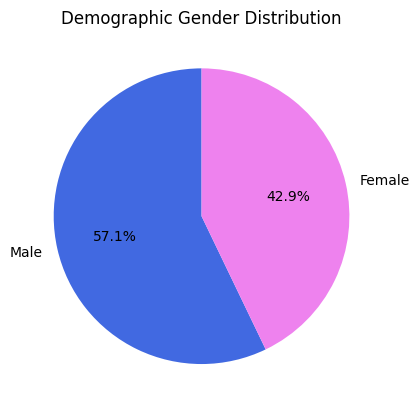

In [ ]:
male = df[df["Gender"] == 1].shape[0]
female = df[df["Gender"] == 2].shape[0]
plt.pie([male,female], labels=["Male", "Female"], autopct='%1.1f%%',
        colors=['royalblue', 'violet'], startangle = 90)
plt.title("Demographic Gender Distribution")
plt.show()

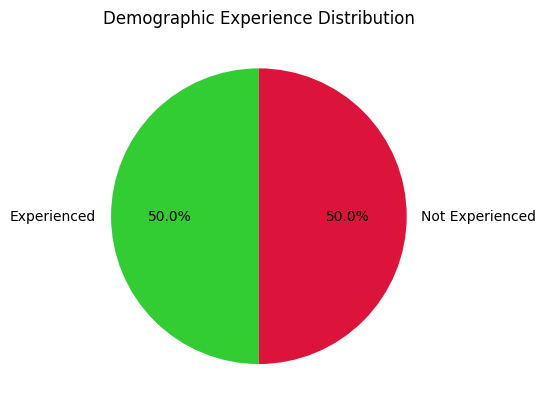

In [ ]:
exp = df[df["Experience"] == 1].shape[0]
non_exp = df[df["Experience"] == 2].shape[0]
plt.pie([exp,non_exp], labels=["Experienced", "Not Experienced"], autopct='%1.1f%%',
        colors=['limegreen', 'crimson'], startangle = 90)
plt.title("Demographic Experience Distribution")
plt.show()
# even in good and bad the distribution was 50 50

In [ ]:
print(df["Age"].min())
print(df["Age"].max())
print(df["Age"].mean())
print(df["Age"].median())
print(df["Age"].std())

16
55
28.694444444444443
22.5
13.360537723234355


In [ ]:
df_good = df[df["Good Interface"] == 1].drop(columns=["Bad Interface"])
df_bad = df[df["Bad Interface"] == 1].drop(columns=["Good Interface"])

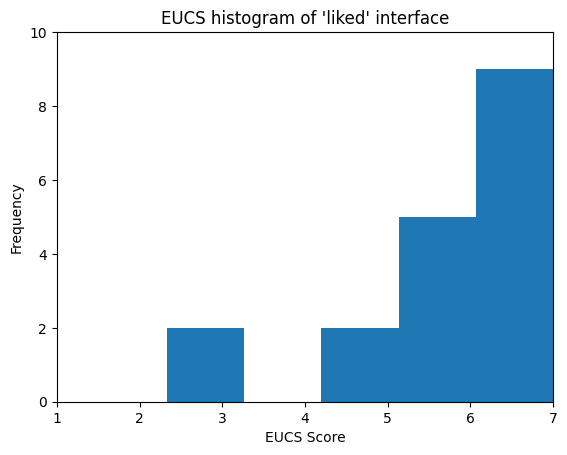

In [ ]:
plt.hist(df_good["EUCS_score"], 5)
plt.xlim([1,7])
plt.ylim([0,10])
plt.xlabel("EUCS Score")
plt.ylabel("Frequency")
plt.title("EUCS histogram of 'liked' interface")
plt.show()

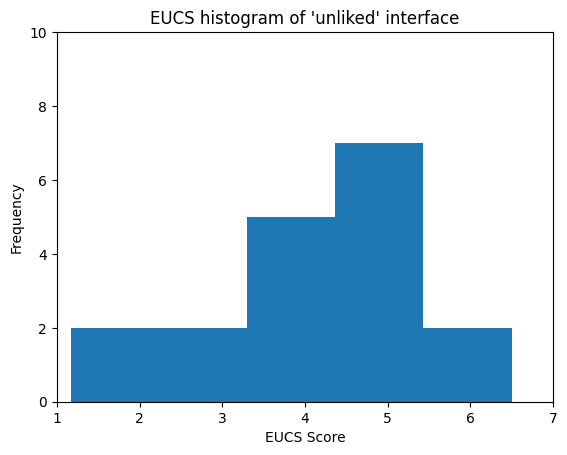

In [ ]:
plt.hist(df_bad["EUCS_score"], 5)
plt.xlim([1,7])
plt.ylim([0,10])
plt.xlabel("EUCS Score")
plt.ylabel("Frequency")
plt.title("EUCS histogram of 'unliked' interface")
plt.show()

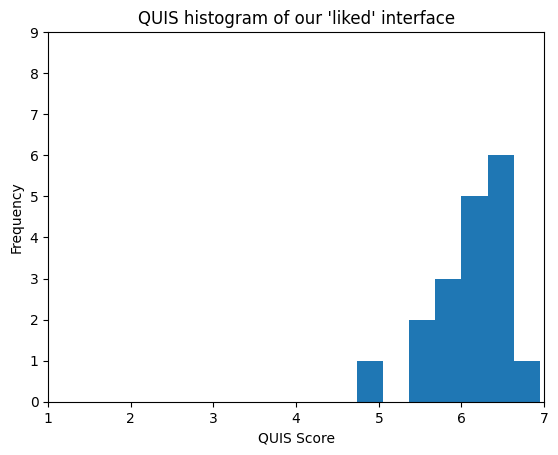

In [ ]:
plt.hist(df_good["QUIS_score"], 7)
plt.xlim([1,7])
plt.ylim([0,9])
plt.xlabel("QUIS Score")
plt.ylabel("Frequency")
plt.title("QUIS histogram of our 'liked' interface")
plt.show()

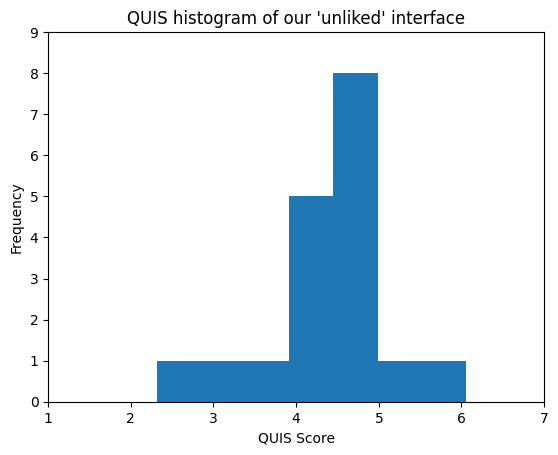

In [ ]:
plt.hist(df_bad["QUIS_score"], 7)
plt.xlim([1,7])
plt.ylim([0,9])
plt.xlabel("QUIS Score")
plt.ylabel("Frequency")
plt.title("QUIS histogram of our 'unliked' interface")
plt.show()

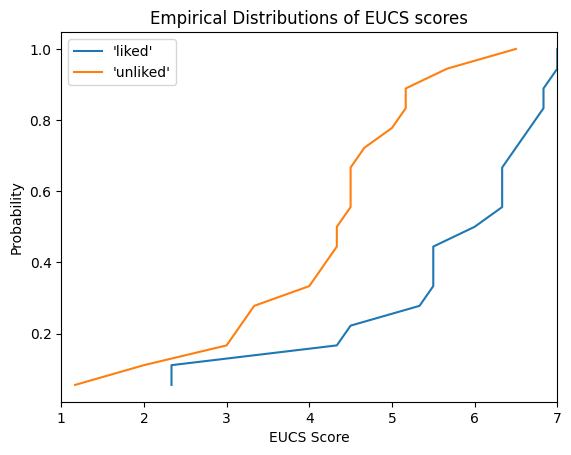

In [ ]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = df_good["EUCS_score"]
ecdf = sm.distributions.ECDF(sample)

plt.plot(ecdf.x, ecdf.y, label="'liked'")

sample = df_bad["EUCS_score"]
ecdf = sm.distributions.ECDF(sample)

plt.plot(ecdf.x, ecdf.y, label="'unliked'")
plt.xlim([1,7])
plt.legend()
plt.xlabel("EUCS Score")
plt.ylabel("Probability")
plt.title("Empirical Distributions of EUCS scores")
plt.show()

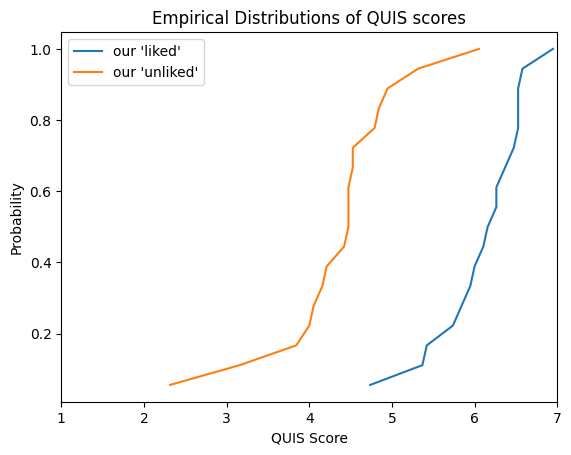

In [ ]:
sample = df_good["QUIS_score"]
ecdf = sm.distributions.ECDF(sample)

plt.plot(ecdf.x, ecdf.y, label="our 'liked'")

sample = df_bad["QUIS_score"]
ecdf = sm.distributions.ECDF(sample)

plt.plot(ecdf.x, ecdf.y, label="our 'unliked'")
plt.xlim([1,7])
plt.legend()
plt.xlabel("QUIS Score")
plt.ylabel("Probability")
plt.title("Empirical Distributions of QUIS scores")
plt.show()

In [ ]:
from scipy.stats import permutation_test

# alpha = 0.05

def statistic(x, y):
    return np.mean(y) - np.mean(x)

# QUIS
# H0: F_bad >= F_good
# H1: F_bad < F_good
quis_res = permutation_test((df_bad["QUIS_score"], df_good["QUIS_score"]), statistic,
                       n_resamples=2000, alternative='greater')

print("p-value: " + str(quis_res.pvalue))
print("test statistic: " + str(quis_res.statistic))
print()

# EUCS
# H0: F_bad >= F_good
# H1: F_bad < F_good
eucs_res = permutation_test((df_bad["EUCS_score"], df_good["EUCS_score"]), statistic,
                       n_resamples=2000, alternative='greater')

print("p-value: " + str(eucs_res.pvalue))
print("test statistic: " + str(eucs_res.statistic))

# REJECTING BOTH H0, F_good IS STOCHASTICALLY GREATER THAN F_bad FOR BOTH SCORES

p-value: 0.0004997501249375312
test statistic: 1.7339181286549703

p-value: 0.0014992503748125937
test statistic: 1.4444444444444429


In [ ]:
from scipy.stats import spearmanr

# CHECKING DEMOGRAPHIC AFFECT ON THE TEST VARIABLES
# EXPERIENCE

# alpha = 0.05

# QUIS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Experience"], df['QUIS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))
print()

# EUCS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Experience"], df['EUCS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))

# NOT REJECTING BOTH H0, THERE ARE LOW CORRELATIONS

p-value: 0.6868283359566323
correlation: 0.06956747406569302

p-value: 0.48376498026725356
correlation: -0.12053734785459103


In [ ]:
from scipy.stats import spearmanr

# CHECKING DEMOGRAPHIC AFFECT ON THE TEST VARIABLES
# GENDER

# alpha = 0.05

# QUIS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Gender"], df['QUIS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))
print()

# EUCS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Gender"], df['EUCS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))

# NOT REJECTING BOTH H0, THERE ARE LOW CORRELATIONS

p-value: 0.7798529405730998
correlation: 0.04826119556543483

p-value: 0.6899386004967416
correlation: 0.06884024791070248


In [ ]:
from scipy.stats import spearmanr

# CHECKING DEMOGRAPHIC AFFECT ON THE TEST VARIABLES
# AGE

# alpha = 0.05

# QUIS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Age"], df['QUIS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))
print()

# EUCS
# H0: no ordinal correlation
# H1: otherwise
spear_res = spearmanr(df["Age"], df['EUCS_score'])
print("p-value: " + str(spear_res.pvalue))
print("correlation: " + str(spear_res.statistic))

# NOT REJECTING BOTH H0, THERE ARE LOW CORRELATIONS

p-value: 0.8240797354795362
correlation: -0.038391396543113465

p-value: 0.710147473099344
correlation: -0.06414286652943296
